# Read me

You can run this file without having to load any external data.

This notebook took about 1 hour to run.

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10


# MLP Fashion MNIST

In [ ]:
#Function to build models with diferent number of neurons, diferent number of layers and different regularizations
def build_model(n_neurons,i=0,n_hidden=1,):
  if i == 1:
    name = f'Model_using_adam_and_L2_regularization_with_{n_hidden}_hidden_layers'
  elif i == 2:
    name = f'Model_using_adam_and_Dropout_regularization_with_{n_hidden}_hidden_layers'
  else:
    name = f'Model_using_adam_and_no_regularization_with_{n_hidden}_hidden_layers'
  model = keras.models.Sequential(name=name)
  model.add(keras.layers.Flatten(input_shape=[28, 28]))
  for layer in range(n_hidden):
    if i == 2:
      model.add(keras.layers.Dropout(rate=0.2))
    if i == 1:
      model.add(keras.layers.Dense(n_neurons[layer], activation="relu",kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01)))
    else:
      model.add(keras.layers.Dense(n_neurons[layer], activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model


In [ ]:
num_classes = 10
epochs = 20
(X_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()


X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

neurons = [[100],[100,300],[100,200,300,400,500]]
#All our models will have either no reg, L2 or Dropout
#We will try diferent number of neurons and number of layers as other hyperparameters tried like optimizer don't seem to affect much
models = []
for n in neurons:
  for i in range(3):
    models.append(build_model(n,i,len(n)))

for model in models:
  model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_using_adam_and_no_regularization_with_1_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Model_using_adam_and_L2_regularization_with_1_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Model_using_adam_and_Dropout_regularization_with_1_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Model_using_adam_and_no_regularization_with_2_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 300)                 │          30,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,810 (436.76 KB)

 Trainable params: 111,810 (436.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Model_using_adam_and_L2_regularization_with_2_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 300)                 │          30,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,810 (436.76 KB)

 Trainable params: 111,810 (436.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Model_using_adam_and_Dropout_regularization_with_2_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 300)                 │          30,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,810 (436.76 KB)

 Trainable params: 111,810 (436.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Model_using_adam_and_no_regularization_with_5_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 400)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 500)                 │         200,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,910 (1.85 MB)

 Trainable params: 484,910 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Model: "Model_using_adam_and_L2_regularization_with_5_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 400)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 500)                 │         200,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,910 (1.85 MB)

 Trainable params: 484,910 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Model: "Model_using_adam_and_Dropout_regularization_with_5_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 400)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 500)                 │         200,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,910 (1.85 MB)

 Trainable params: 484,910 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

# 1 hidden layer models

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7722 - loss: 0.6559 - val_accuracy: 0.8486 - val_loss: 0.4166
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8587 - loss: 0.3984 - val_accuracy: 0.8714 - val_loss: 0.3579
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8728 - loss: 0.3472 - val_accuracy: 0.8656 - val_loss: 0.3617
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8834 - loss: 0.3263 - val_accuracy: 0.8824 - val_loss: 0.3341
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8838 - loss: 0.3097 - val_accuracy: 0.8744 - val_loss: 0.3445
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8932 - loss: 0.2889 - val_accuracy: 0.8872 - val_loss: 0.3064
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.2771 - val_accuracy: 0.8914 - val_loss: 0.3092
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8974 - loss: 0.2681 - 

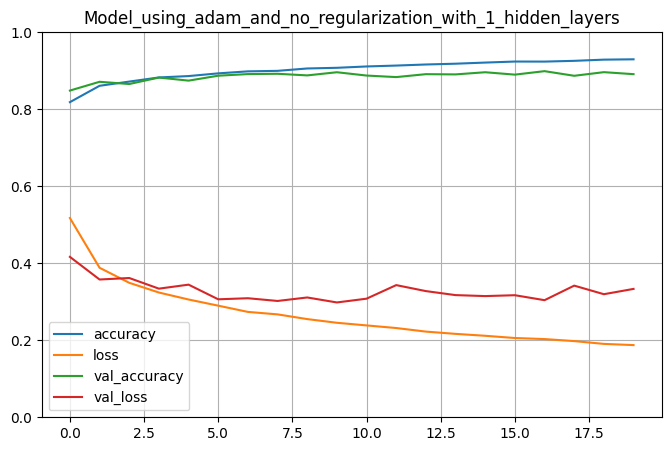

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7621 - loss: 1.2890 - val_accuracy: 0.8296 - val_loss: 0.6243
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8044 - loss: 0.6618 - val_accuracy: 0.8236 - val_loss: 0.6101
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8167 - loss: 0.6267 - val_accuracy: 0.8460 - val_loss: 0.5619
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8207 - loss: 0.6055 - val_accuracy: 0.8134 - val_loss: 0.6184
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8258 - loss: 0.6015 - val_accuracy: 0.8390 - val_loss: 0.5609
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8302 - loss: 0.5893 - val_accuracy: 0.7992 - val_loss: 0.6626
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8312 - loss: 0.5767 - val_accuracy: 0.8512 - val_loss: 0.5268
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8348 - loss: 0.5645 - 

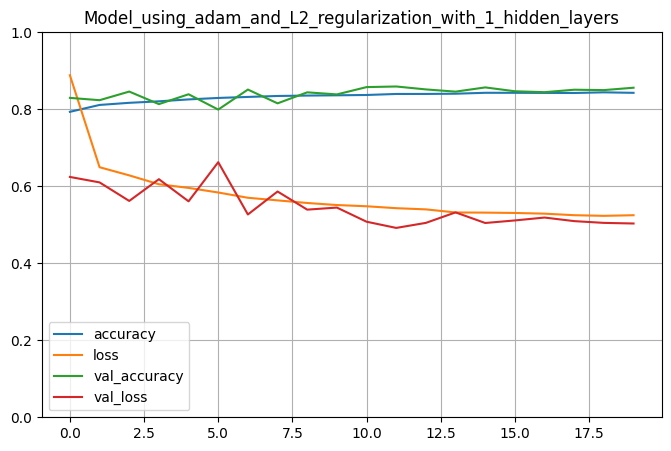

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7599 - loss: 0.6973 - val_accuracy: 0.8556 - val_loss: 0.4144
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8458 - loss: 0.4304 - val_accuracy: 0.8674 - val_loss: 0.3743
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8554 - loss: 0.3972 - val_accuracy: 0.8606 - val_loss: 0.3865
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8639 - loss: 0.3743 - val_accuracy: 0.8802 - val_loss: 0.3385
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8697 - loss: 0.3534 - val_accuracy: 0.8774 - val_loss: 0.3411
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8733 - loss: 0.3406 - val_accuracy: 0.8822 - val_loss: 0.3310
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8792 - loss: 0.3276 - val_accuracy: 0.8852 - val_loss: 0.3204
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8850 - loss: 0.3084 - 

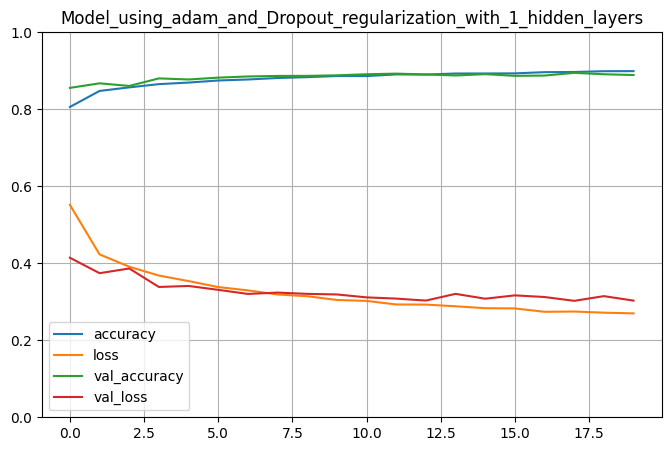

In [ ]:
#Models with 1 hidden layer, 100 neurons and the 3 regularization techniques
scores = []
for model in models[:3]:
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=epochs,validation_data=(X_valid, y_valid))

  score = model.evaluate(x_test, y_test, verbose=1)
  scores.append((score,model.name,model.count_params()))
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.title(model.name)
  plt.gca().set_ylim(0, 1)
  plt.show()

# 2 hidden layer models

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7774 - loss: 0.6273 - val_accuracy: 0.8632 - val_loss: 0.3769
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8627 - loss: 0.3730 - val_accuracy: 0.8678 - val_loss: 0.3546
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8756 - loss: 0.3312 - val_accuracy: 0.8854 - val_loss: 0.3250
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8870 - loss: 0.3030 - val_accuracy: 0.8838 - val_loss: 0.3418
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8912 - loss: 0.2917 - val_accuracy: 0.8878 - val_loss: 0.3041
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8959 - loss: 0.2732 - val_accuracy: 0.8890 - val_loss: 0.3111
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9016 - loss: 0.2598 - val_accuracy: 0.8864 - val_loss: 0.3222
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9065 - loss: 0.2488 - 

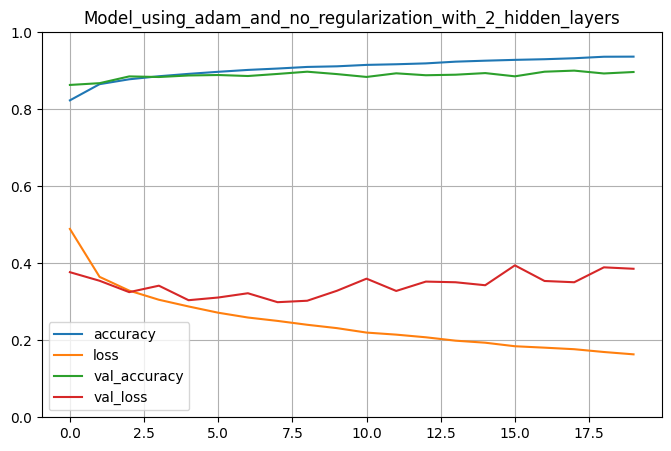

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7557 - loss: 2.8546 - val_accuracy: 0.8250 - val_loss: 0.6694
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8180 - loss: 0.6787 - val_accuracy: 0.8362 - val_loss: 0.6081
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8284 - loss: 0.6204 - val_accuracy: 0.8444 - val_loss: 0.5733
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8318 - loss: 0.5935 - val_accuracy: 0.8484 - val_loss: 0.5460
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8371 - loss: 0.5680 - val_accuracy: 0.8444 - val_loss: 0.5578
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8328 - loss: 0.5705 - val_accuracy: 0.8518 - val_loss: 0.5255
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8403 - loss: 0.5516 - val_accuracy: 0.8436 - val_loss: 0.5339
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8341 - loss: 0.5575 - 

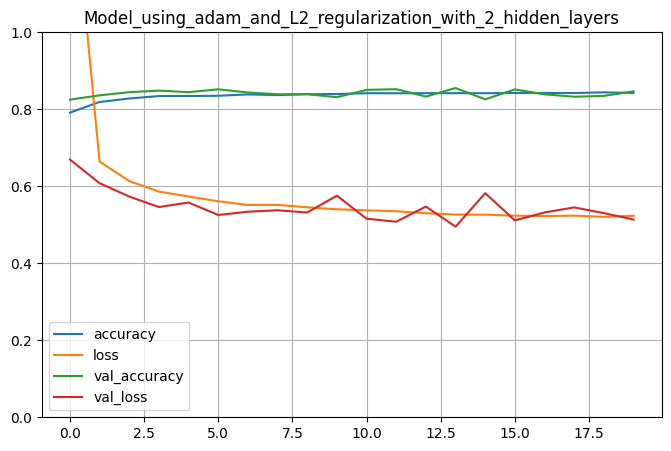

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7323 - loss: 0.7350 - val_accuracy: 0.8418 - val_loss: 0.4340
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8269 - loss: 0.4652 - val_accuracy: 0.8694 - val_loss: 0.3622
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8419 - loss: 0.4172 - val_accuracy: 0.8736 - val_loss: 0.3438
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8533 - loss: 0.3952 - val_accuracy: 0.8684 - val_loss: 0.3483
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8562 - loss: 0.3830 - val_accuracy: 0.8776 - val_loss: 0.3354
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8608 - loss: 0.3705 - val_accuracy: 0.8808 - val_loss: 0.3186
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8657 - loss: 0.3569 - val_accuracy: 0.8828 - val_loss: 0.3248
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8657 - loss: 0.3583 - 

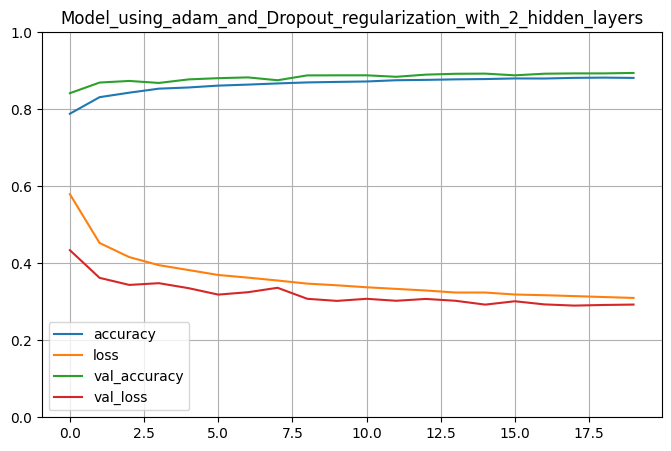

In [ ]:
#Models with 2 hidden layer, 100,300 neurons and the 3 regularization techniques
for model in models[3:6]:
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

  score = model.evaluate(x_test, y_test, verbose=1)
  scores.append((score,model.name,model.count_params()))
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.title(model.name)
  plt.gca().set_ylim(0, 1)
  plt.show()

# 5 hidden layer models

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7632 - loss: 0.6419 - val_accuracy: 0.8548 - val_loss: 0.4416
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8545 - loss: 0.4066 - val_accuracy: 0.8624 - val_loss: 0.3967
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8673 - loss: 0.3636 - val_accuracy: 0.8582 - val_loss: 0.3879
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8749 - loss: 0.3387 - val_accuracy: 0.8782 - val_loss: 0.3434
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8814 - loss: 0.3232 - val_accuracy: 0.8772 - val_loss: 0.3400
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8892 - loss: 0.3034 - val_accuracy: 0.8706 - val_loss: 0.3599
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8910 - loss: 0.2890 - val_accuracy: 0.8860 - val_loss: 0.3295
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8965 - loss: 0.2

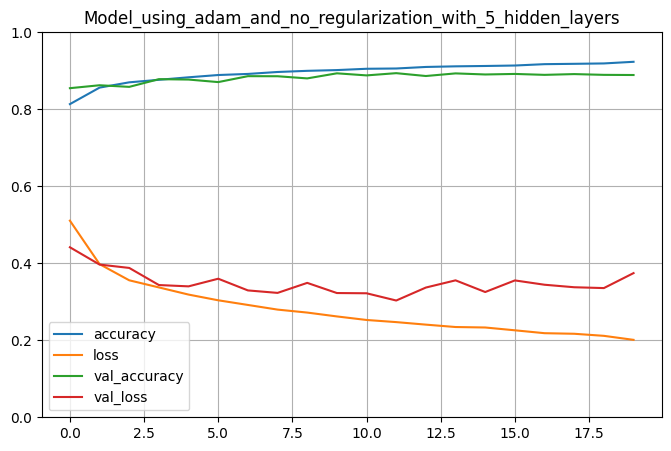

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.7319 - loss: 6.4979 - val_accuracy: 0.7810 - val_loss: 0.8974
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.7961 - loss: 0.8704 - val_accuracy: 0.8202 - val_loss: 0.7604
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8094 - loss: 0.7936 - val_accuracy: 0.8244 - val_loss: 0.7393
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8127 - loss: 0.7587 - val_accuracy: 0.7964 - val_loss: 0.7843
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8172 - loss: 0.7320 - val_accuracy: 0.8358 - val_loss: 0.6808
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8228 - loss: 0.7110 - val_accuracy: 0.8432 - val_loss: 0.6621
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8292 - loss: 0.6933 - val_accuracy: 0.8418 - val_loss: 0.6548
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8219 - loss: 0.6

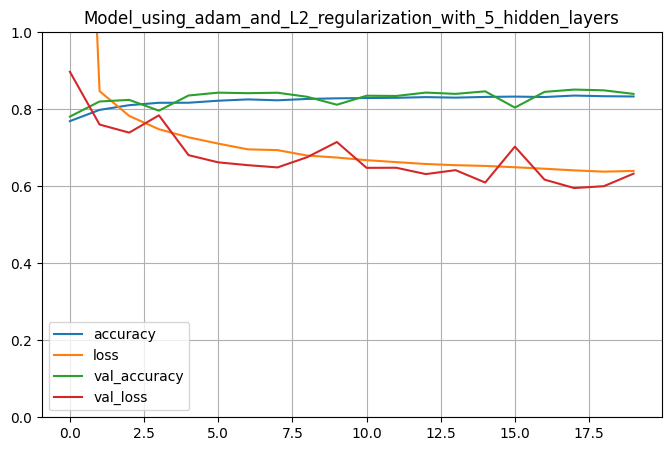

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6813 - loss: 0.8464 - val_accuracy: 0.8408 - val_loss: 0.4404
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8124 - loss: 0.5236 - val_accuracy: 0.8608 - val_loss: 0.3963
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8269 - loss: 0.4818 - val_accuracy: 0.8602 - val_loss: 0.4006
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8395 - loss: 0.4522 - val_accuracy: 0.8626 - val_loss: 0.3720
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8442 - loss: 0.4436 - val_accuracy: 0.8738 - val_loss: 0.3631
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8429 - loss: 0.4368 - val_accuracy: 0.8682 - val_loss: 0.3641
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8495 - loss: 0.4206 - val_accuracy: 0.8734 - val_loss: 0.3537
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8543 - loss: 0.4159 

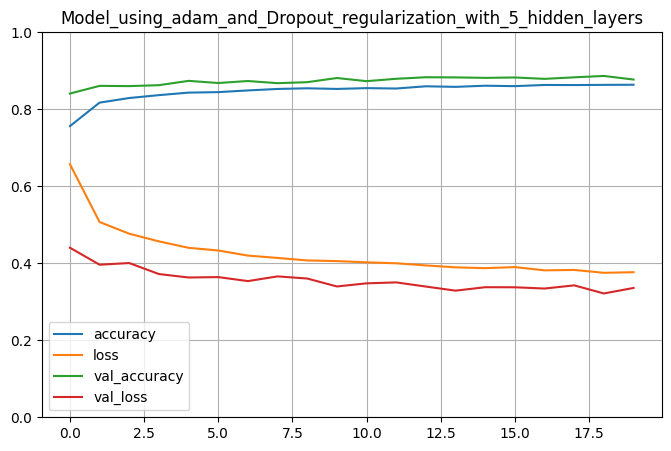

In [ ]:
#Models with 5 hidden layer, 100,200,300,400,500 neurons and the 3 regularization techniques
for model in models[6:]:
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=epochs,validation_data=(X_valid, y_valid))

  score = model.evaluate(x_test, y_test, verbose=1)
  scores.append((score,model.name,model.count_params()))
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.title(model.name)
  plt.gca().set_ylim(0, 1)
  plt.show()

# Low parameters models

In [ ]:
#Model with low number of parameters 8000 with only 1 hidden layer and 10 neurons
low_neurons = [10]
model_low_parameters = build_model(low_neurons,0,len(low_neurons))
model_low_parameters.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_using_adam_and_no_regularization_with_1_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6800 - loss: 0.9407 - val_accuracy: 0.8344 - val_loss: 0.4817
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8333 - loss: 0.4769 - val_accuracy: 0.8480 - val_loss: 0.4451
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8444 - loss: 0.4429 - val_accuracy: 0.8558 - val_loss: 0.4196
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8540 - loss: 0.4246 - val_accuracy: 0.8564 - val_loss: 0.4216
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8561 - loss: 0.4070 - val_accuracy: 0.8590 - val_loss: 0.4075
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8555 - loss: 0.4095 - val_accuracy: 0.8568 - val_loss: 0.4163
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8588 - loss: 0.4037 - val_accuracy: 0.8550 - val_loss: 0.4152
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8578 - loss: 0.3950 -

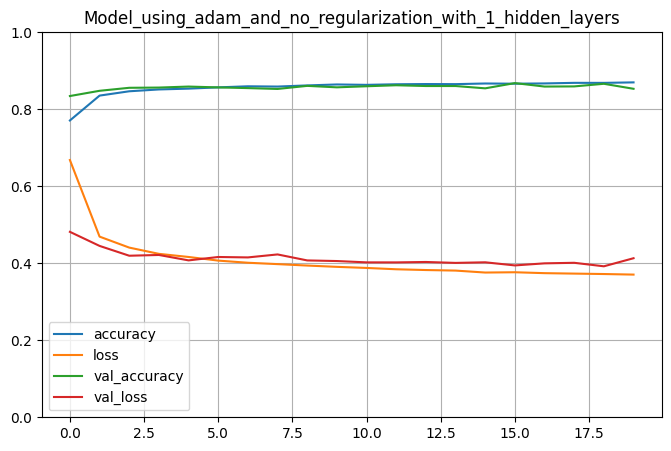

In [ ]:
model_low_parameters.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history = model_low_parameters.fit(X_train, y_train, epochs=epochs,validation_data=(X_valid, y_valid))

score = model_low_parameters.evaluate(x_test, y_test, verbose=1)
scores.append((score,model_low_parameters.name,model_low_parameters.count_params()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(model_low_parameters.name)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#Model with even lower number of parameters 4000 with only 1 hidden layer and 5 neurons
lower_neurons = [5]
model_lower_parameters = build_model(lower_neurons,0,len(lower_neurons))
model_lower_parameters.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_using_adam_and_no_regularization_with_1_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 5)                   │           3,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5373 - loss: 1.2478 - val_accuracy: 0.7826 - val_loss: 0.6506
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7878 - loss: 0.6181 - val_accuracy: 0.8146 - val_loss: 0.5549
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8105 - loss: 0.5564 - val_accuracy: 0.8262 - val_loss: 0.5305
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8154 - loss: 0.5350 - val_accuracy: 0.8254 - val_loss: 0.5147
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8215 - loss: 0.5194 - val_accuracy: 0.8292 - val_loss: 0.5175
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8211 - loss: 0.5083 - val_accuracy: 0.8368 - val_loss: 0.4924
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8288 - loss: 0.4930 - val_accuracy: 0.8356 - val_loss: 0.4906
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8305 - loss: 0.4840 

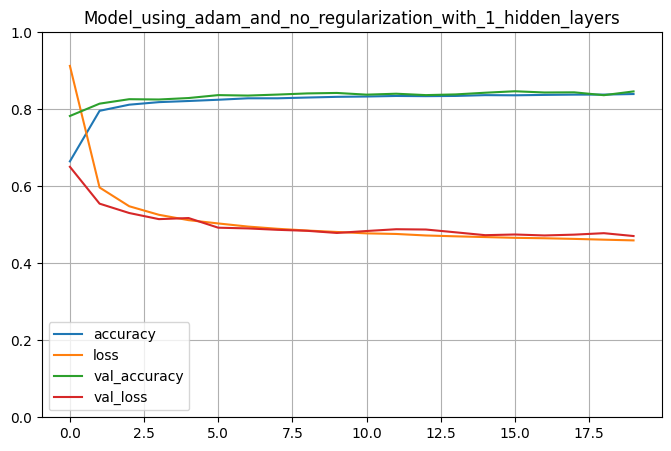

In [ ]:
model_lower_parameters.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history = model_lower_parameters.fit(X_train, y_train, epochs=epochs,validation_data=(X_valid, y_valid))

score = model_lower_parameters.evaluate(x_test, y_test, verbose=1)
scores.append((score,model_lower_parameters.name,model_lower_parameters.count_params()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(model_lower_parameters.name)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#Model with lowest number of parameters 1600 with only 1 hidden layer and 2 neurons
lowest_neurons = [2]
model_lowest_parameters = build_model(lowest_neurons,0,len(lowest_neurons))
model_lowest_parameters.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_using_adam_and_no_regularization_with_1_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 2)                   │           1,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 10)                  │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,600 (6.25 KB)

 Trainable params: 1,600 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2584 - loss: 1.9543 - val_accuracy: 0.5838 - val_loss: 1.2097
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5846 - loss: 1.1613 - val_accuracy: 0.6382 - val_loss: 1.0416
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6281 - loss: 1.0181 - val_accuracy: 0.6658 - val_loss: 0.9616
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6453 - loss: 0.9638 - val_accuracy: 0.6740 - val_loss: 0.9244
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6582 - loss: 0.9208 - val_accuracy: 0.6810 - val_loss: 0.9001
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6658 - loss: 0.9082 - val_accuracy: 0.6824 - val_loss: 0.8877
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6720 - loss: 0.8930 - val_accuracy: 0.6948 - val_loss: 0.8738
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6813 - loss: 0.880

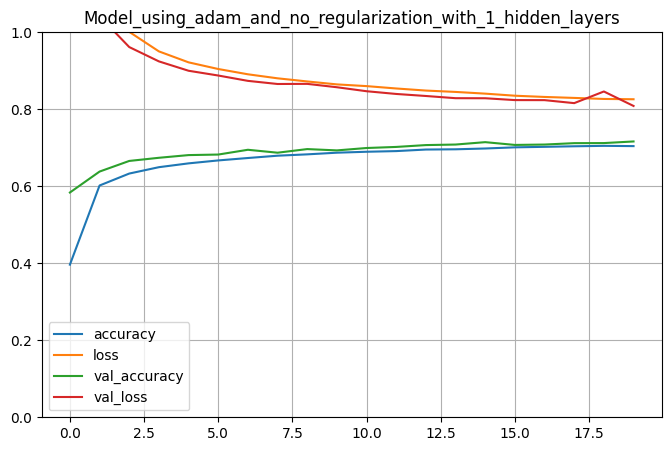

In [ ]:
model_lowest_parameters.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history = model_lowest_parameters.fit(X_train, y_train, epochs=epochs,validation_data=(X_valid, y_valid))

score = model_lowest_parameters.evaluate(x_test, y_test, verbose=1)
scores.append((score,model_lowest_parameters.name,model_lowest_parameters.count_params()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(model_lowest_parameters.name)
plt.gca().set_ylim(0, 1)
plt.show()

# High parameters models

In [ ]:
#Model with high number of parameters, 5.8 million parameters 12 hidden layers
neurons_high = [100,200,300,400,500,600,700,800,900,1000,1100,1200]
model_high = build_model(neurons_high,0,len(neurons_high))
model_high.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_using_adam_and_no_regularization_with_12_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 400)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 500)                 │         200,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 600)                 │         300,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 700)                 │         420,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 800)                 │         560,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 900)                 │         720,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 1000)                │         901,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 1100)                │       1,101,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 1200)                │       1,321,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,818,210 (22.19 MB)

 Trainable params: 5,818,210 (22.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 138s 75ms/step - accuracy: 0.5910 - loss: 1.0110 - val_accuracy: 0.7386 - val_loss: 0.6618
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6995 - loss: 0.8001 - val_accuracy: 0.7694 - val_loss: 0.6587
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7846 - loss: 0.5954 - val_accuracy: 0.7942 - val_loss: 0.5450
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7959 - loss: 0.5681 - val_accuracy: 0.8282 - val_loss: 0.4893
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8234 - loss: 0.4809 - val_accuracy: 0.8234 - val_loss: 0.5417
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8372 - loss: 0.4563 - val_accuracy: 0.8544 - val_loss: 0.4580
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8426 - loss: 0.4505 - val_accuracy: 0.8520 - val_loss: 0.4879
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8508 - loss:

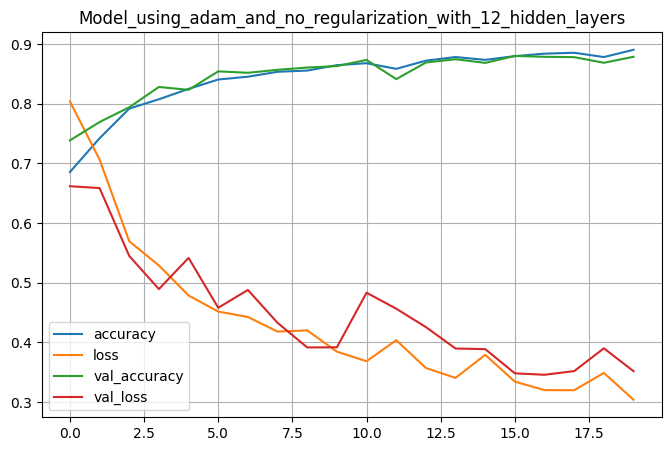

In [ ]:
model_high.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history = model_high.fit(X_train, y_train, epochs=epochs,validation_data=(X_valid, y_valid))

score = model_high.evaluate(x_test, y_test, verbose=1)
scores.append((score,model_high.name,model_high.count_params()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(model_high.name)
plt.show()

In [ ]:
#Model with highest number of parameters, 11.3 million parameters 15 hidden layers
neurons_high = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]
model_highest = build_model(neurons_high,0,len(neurons_high))
model_highest.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_using_adam_and_no_regularization_with_15_hidden_layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_27 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 400)                 │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 500)                 │         200,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 600)                 │         300,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 700)                 │         420,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 800)                 │         560,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 900)                 │         720,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 1000)                │         901,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 1100)                │       1,101,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 1200)                │       1,321,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 1300)                │       1,561,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 1400)                │       1,821,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 1500)                │       2,101,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 10)                  │          15,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,305,410 (43.13 MB)

 Trainable params: 11,305,410 (43.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 144s 78ms/step - accuracy: 0.4221 - loss: 1.4296 - val_accuracy: 0.6826 - val_loss: 0.8264
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6587 - loss: 0.8652 - val_accuracy: 0.6832 - val_loss: 0.8069
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6967 - loss: 0.7882 - val_accuracy: 0.6576 - val_loss: 0.8251
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7359 - loss: 0.6908 - val_accuracy: 0.7448 - val_loss: 0.6955
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7568 - loss: 0.6820 - val_accuracy: 0.6814 - val_loss: 0.9138
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7469 - loss: 0.7076 - val_accuracy: 0.7750 - val_loss: 0.6304
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7595 - loss: 0.6683 - val_accuracy: 0.7484 - val_loss: 0.6996
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7280 - los

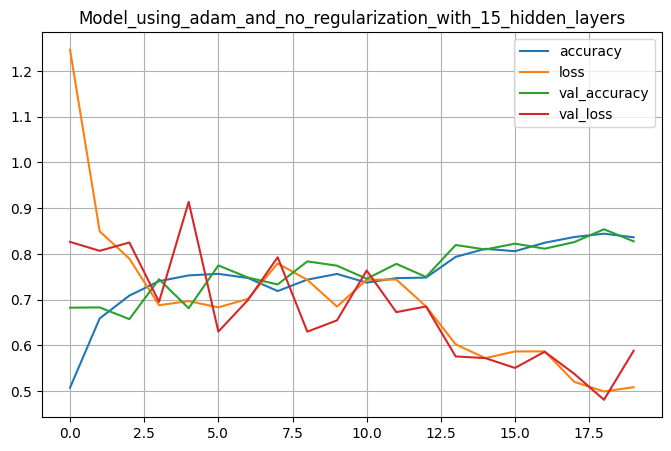

In [ ]:
model_highest.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history = model_highest.fit(X_train, y_train, epochs=epochs,validation_data=(X_valid, y_valid))

score = model_highest.evaluate(x_test, y_test, verbose=1)
scores.append((score,model_highest.name,model_highest.count_params()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(model_highest.name)
plt.show()

# MLP Fashion MNIST Results

In [ ]:
df = pd.DataFrame(scores, columns=["Test","Name","Num params"])

df[["Test loss","Test accuracy"]] = pd.DataFrame(df['Test'].tolist(), index=df.index)
df.drop(columns=['Test'], inplace=True)
df.set_index(df['Name'] + ' (Params: ' + df['Num params'].astype(str) + ')', inplace=True)
df.drop(columns=['Name'], inplace=True)

reg = []
for i, row in df.iterrows():
  if 'L2' in row.name:
    reg.append(0)
  elif 'Dropout' in row.name:
    reg.append(1)
  else:
    reg.append(2)

df['Reg'] = reg
df = df.sort_values("Num params")

df


,Num params,Test loss,Test accuracy,Reg
Model_using_adam_and_no_regularization_with_1_hidden_layers (Params: 1600),1600,316.256012,0.4474,2
Model_using_adam_and_no_regularization_with_1_hidden_layers (Params: 3985),3985,123.548775,0.7404,2
Model_using_adam_and_no_regularization_with_1_hidden_layers (Params: 7960),7960,88.258347,0.8097,2
Model_using_adam_and_no_regularization_with_1_hidden_layers (Params: 79510),79510,74.686577,0.8555,2
Model_using_adam_and_Dropout_regularization_with_1_hidden_layers (Params: 79510),79510,57.812458,0.8466,1
Model_using_adam_and_L2_regularization_with_1_hidden_layers (Params: 79510),79510,119.366501,0.7226,0
Model_using_adam_and_L2_regularization_with_2_hidden_layers (Params: 111810),111810,56.043613,0.7165,0
Model_using_adam_and_no_regularization_with_2_hidden_layers (Params: 111810),111810,76.834717,0.8704,2
Model_using_adam_and_Dropout_regularization_with_2_hidden_layers (Params: 111810),111810,49.814926,0.8395,1
Model_using_adam_and_no_regularization_with_5_hidden_layers (Params: 484910),484910,70.327553,0.8378,2


In [ ]:
df.sort_values("Test accuracy")

,Num params,Test loss,Test accuracy,Reg
Model_using_adam_and_no_regularization_with_15_hidden_layers (Params: 11305410),11305410,198.868500,0.2053,2
Model_using_adam_and_no_regularization_with_1_hidden_layers (Params: 1600),1600,316.256012,0.4474,2
Model_using_adam_and_L2_regularization_with_5_hidden_layers (Params: 484910),484910,42.450275,0.5181,0
Model_using_adam_and_no_regularization_with_12_hidden_layers (Params: 5818210),5818210,55.153168,0.6726,2
Model_using_adam_and_L2_regularization_with_2_hidden_layers (Params: 111810),111810,56.043613,0.7165,0
Model_using_adam_and_L2_regularization_with_1_hidden_layers (Params: 79510),79510,119.366501,0.7226,0
Model_using_adam_and_no_regularization_with_1_hidden_layers (Params: 3985),3985,123.548775,0.7404,2
Model_using_adam_and_no_regularization_with_1_hidden_layers (Params: 7960),7960,88.258347,0.8097,2
Model_using_adam_and_Dropout_regularization_with_5_hidden_layers (Params: 484910),484910,35.557945,0.8331,1
Model_using_adam_and_no_regularization_with_5_hidden_layers (Params: 484910),484910,70.327553,0.8378,2


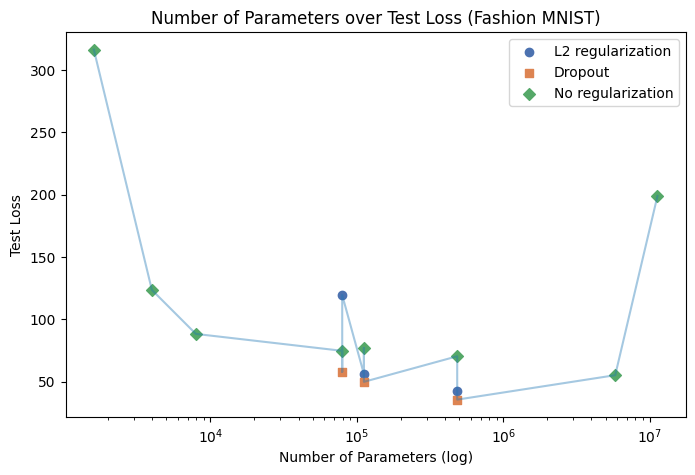

In [ ]:
palette = sns.color_palette("deep", n_colors=3)

marker_styles = {0: 'o', 1: 's', 2: 'D'}
plt.figure(figsize=(8, 5))
plt.plot(df['Num params'], df['Test loss'], alpha = 0.4)

for reg_value, color in enumerate(palette):
    mask = df['Reg'] == reg_value
    if reg_value == 2:
        label = 'No regularization'
    elif reg_value == 1:
        label = 'Dropout'
    else:
        label = 'L2 regularization'
    plt.scatter(df.loc[mask, 'Num params'], df.loc[mask, 'Test loss'],
                color=color, label=label, marker=marker_styles[reg_value])

plt.ylabel('Test Loss')
plt.xlabel('Number of Parameters (log)')
plt.xscale('log')
plt.title('Number of Parameters over Test Loss (Fashion MNIST)')
plt.legend()

plt.savefig('MLP_mnist_Ushape.png')

plt.show()


In [ ]:
top_3_models = df.sort_values("Test accuracy",ascending=False)[:3]
top_3_models

,Num params,Test loss,Test accuracy,Reg
Model_using_adam_and_no_regularization_with_2_hidden_layers (Params: 111810),111810,76.834717,0.8704,2
Model_using_adam_and_no_regularization_with_1_hidden_layers (Params: 79510),79510,74.686577,0.8555,2
Model_using_adam_and_Dropout_regularization_with_1_hidden_layers (Params: 79510),79510,57.812458,0.8466,1


In [ ]:
df.to_csv('ModelsMLP.csv')

#3 best MLP models on CIFAR

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train_final = x_train[10000:]
y_train_final = y_train[10000:]
print(
x_train.shape,
x_val.shape,
x_test.shape,
y_train.shape,
y_val.shape,
y_test.shape)
class_names_cifar = [
    'Airplane',    # 0
    'Automobile',  # 1
    'Bird',        # 2
    'Cat',         # 3
    'Deer',        # 4
    'Dog',         # 5
    'Frog',        # 6
    'Horse',       # 7
    'Ship',        # 8
    'Truck'        # 9
]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1) (10000, 1)


In [ ]:
def plot_training_history(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_accuracy) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


def test_accuracy(model,x_test,y_test,class_names):
    y_pred_prob= model.predict(x_test)
    y_pred= np.argmax(y_pred_prob, axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print(classification_report(y_test, y_pred, target_names=class_names))


In [ ]:
mlp_cifar_1 = keras.models.Sequential([
    keras.layers.Input(shape=[32, 32, 3]),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
mlp_cifar_1.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
mlp_cifar_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_28 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 300)                 │          30,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 340,610 (1.30 MB)

 Trainable params: 340,610 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mlp_cifar_2 = keras.models.Sequential([
    keras.layers.Input(shape=[32, 32, 3]),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
mlp_cifar_2.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
mlp_cifar_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_29 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 308,310 (1.18 MB)

 Trainable params: 308,310 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

mlp_cifar_3 = keras.models.Sequential([
    keras.layers.Input(shape=[32, 32, 3]),
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

mlp_cifar_3.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
mlp_cifar_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 308,310 (1.18 MB)

 Trainable params: 308,310 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_1=mlp_cifar_1.fit(x_train,y_train,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2751 - loss: 1.9776 - val_accuracy: 0.3840 - val_loss: 1.6899
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3829 - loss: 1.7099 - val_accuracy: 0.3962 - val_loss: 1.6609
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4165 - loss: 1.6230 - val_accuracy: 0.4447 - val_loss: 1.5423
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4317 - loss: 1.5786 - val_accuracy: 0.4446 - val_loss: 1.5230
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4509 - loss: 1.5301 - val_accuracy: 0.4669 - val_loss: 1.4792
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4584 - loss: 1.5057 - val_accuracy: 0.4729 - val_loss: 1.4683
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4650 - loss: 1.4848 - val_accuracy: 0.4864 - val_loss: 1.4365
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4756 - loss: 1.4650 

In [ ]:
history_2=mlp_cifar_2.fit(x_train,y_train,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2797 - loss: 2.0159 - val_accuracy: 0.3477 - val_loss: 1.8116
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3619 - loss: 1.7883 - val_accuracy: 0.3739 - val_loss: 1.7278
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3899 - loss: 1.7056 - val_accuracy: 0.4006 - val_loss: 1.6702
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4093 - loss: 1.6518 - val_accuracy: 0.4181 - val_loss: 1.6045
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4147 - loss: 1.6387 - val_accuracy: 0.4244 - val_loss: 1.6008
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4174 - loss: 1.6275 - val_accuracy: 0.4305 - val_loss: 1.5962
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4239 - loss: 1.6065 - val_accuracy: 0.4240 - val_loss: 1.5842
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4318 - loss: 1.5931

In [ ]:
history_3=mlp_cifar_3.fit(x_train,y_train,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2607 - loss: 2.0385 - val_accuracy: 0.3577 - val_loss: 1.7997
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3482 - loss: 1.8160 - val_accuracy: 0.3705 - val_loss: 1.7639
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3658 - loss: 1.7664 - val_accuracy: 0.3964 - val_loss: 1.6973
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3826 - loss: 1.7319 - val_accuracy: 0.4125 - val_loss: 1.6560
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3812 - loss: 1.7278 - val_accuracy: 0.4105 - val_loss: 1.6516
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3870 - loss: 1.7062 - val_accuracy: 0.4147 - val_loss: 1.6507
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3913 - loss: 1.7051 - val_accuracy: 0.3983 - val_loss: 1.6665
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3889 - loss: 1.7052 

In [ ]:
mlp_cifar_1.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4690 - loss: 1.5031


[1.5150388479232788, 0.46630001068115234]

In [ ]:
mlp_cifar_2.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4286 - loss: 1.5950


[1.5972602367401123, 0.42640000581741333]

In [ ]:
mlp_cifar_3.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4140 - loss: 1.6350


[1.638975739479065, 0.4090000092983246]

In [ ]:
test_accuracy(mlp_cifar_1,x_test,y_test,class_names_cifar)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[583  21  64  15  18   8  23  19 212  37]
 [ 60 542  31  15   6  11  17  20 120 178]
 [108  24 350  59 137  42 147  42  74  17]
 [ 52  22 122 287  60 115 169  36  88  49]
 [ 77  10 151  50 416  23 151  49  63  10]
 [ 43  19 107 230  72 230 111  51 107  30]
 [ 16  17  85  75 107  15 613  12  34  26]
 [ 91  24  89  75 106  50  51 421  52  41]
 [ 99  47   7  16  12   7  11   9 747  45]
 [ 79 145  16  26  12  16  28  32 172 474]]
              precision    recall  f1-score   support

    Airplane       0.48      0.58      0.53      1000
  Automobile       0.62      0.54      0.58      1000
        Bird       0.34      0.35      0.35      1000
         Cat       0.34      0.29      0.31      1000
        Deer       0.44      0.42      0.43      1000
         Dog       0.44      0.23      0.30      1000
        Frog       0.46      0.61      0.53      1000
       Horse       0.61      0.42      0.50      1000
        Ship       0.45      0.75      0.

In [ ]:
test_accuracy(mlp_cifar_2,x_test,y_test,class_names_cifar)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[417  27 144  19   4  15  19  66 144 145]
 [ 36 472  20  26   6  17  19  41  41 322]
 [ 68  24 424  71  33  77 122 105  24  52]
 [ 23  20 164 264  24 162 122  93  30  98]
 [ 42   6 331  54 143  45 152 152  17  58]
 [ 29  14 173 164  19 330  85 112  25  49]
 [  5  13 184 123  31  57 475  52  17  43]
 [ 32  15 120  45  25  73  28 542  12 108]
 [112  55  20  28   6  18  14  26 510 211]
 [ 25 117  15  23   5  14  20  56  38 687]]
              precision    recall  f1-score   support

    Airplane       0.53      0.42      0.47      1000
  Automobile       0.62      0.47      0.54      1000
        Bird       0.27      0.42      0.33      1000
         Cat       0.32      0.26      0.29      1000
        Deer       0.48      0.14      0.22      1000
         Dog       0.41      0.33      0.37      1000
        Frog       0.45      0.47      0.46      1000
       Horse       0.44      0.54      0.48      1000
        Ship       0.59      0.51      0.

In [ ]:
test_accuracy(mlp_cifar_3,x_test,y_test,class_names_cifar)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[458 101  51  77   9   1  24  27 171  81]
 [ 27 674  14  39   9   4  23  23  54 133]
 [107  60 191 174 118  11 203  71  36  29]
 [ 27  55  63 413  47  70 176  37  41  71]
 [ 45  30 152 111 271  11 231  85  36  28]
 [ 22  48  65 357  70 135 133  64  72  34]
 [  5  34  65 188  87  23 530  21  17  30]
 [ 33  62  46 143 113  23  47 389  33 111]
 [123 132  14  47   9   2  11   9 546 107]
 [ 24 301   4  47   8   4  27  22  80 483]]
              precision    recall  f1-score   support

    Airplane       0.53      0.46      0.49      1000
  Automobile       0.45      0.67      0.54      1000
        Bird       0.29      0.19      0.23      1000
         Cat       0.26      0.41      0.32      1000
        Deer       0.37      0.27      0.31      1000
         Dog       0.48      0.14      0.21      1000
        Frog       0.38      0.53      0.44      1000
       Horse       0.52      0.39      0.45      1000
        Ship       0.50      0.55      0.

################################################ M L P 1 #################################  



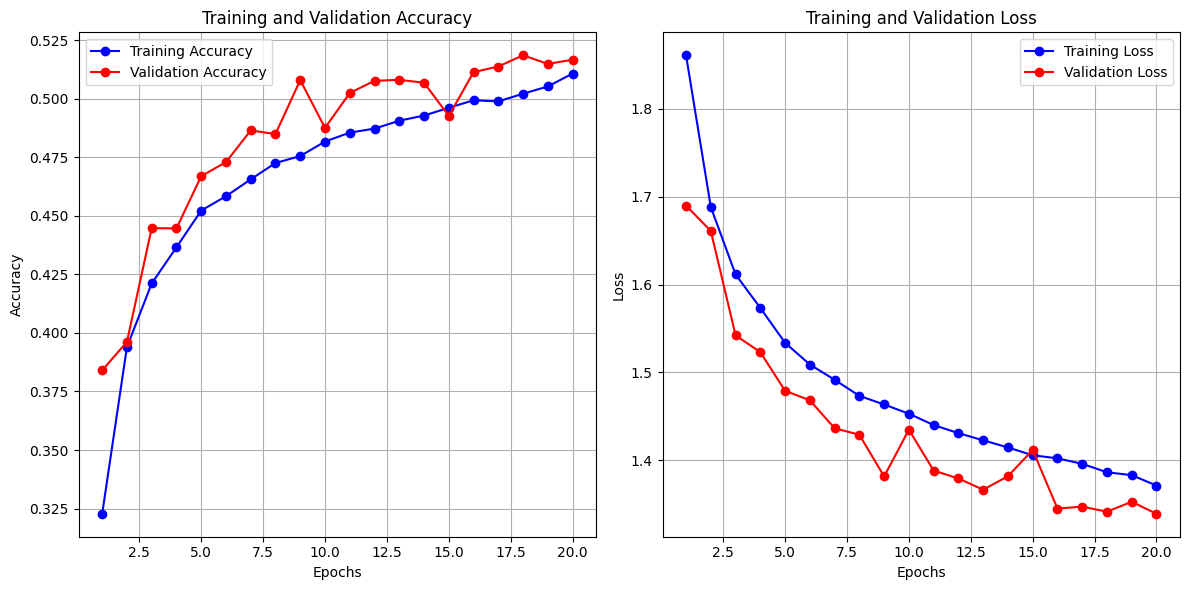

################################################ M L P 2 #################################  



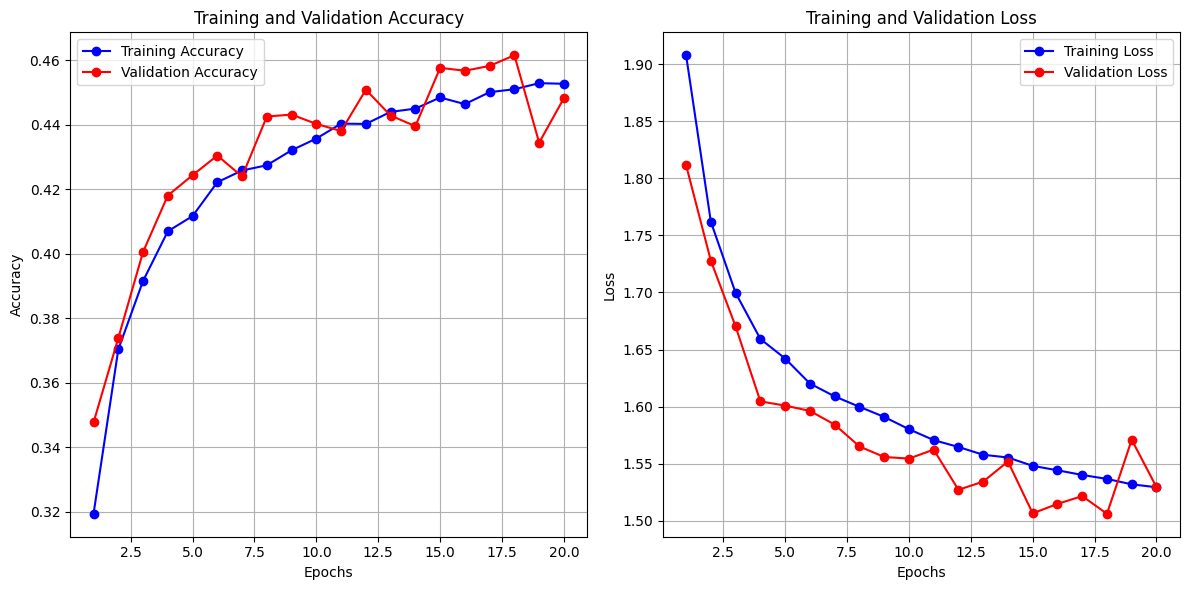

################################################ M L P 3 ################################# 



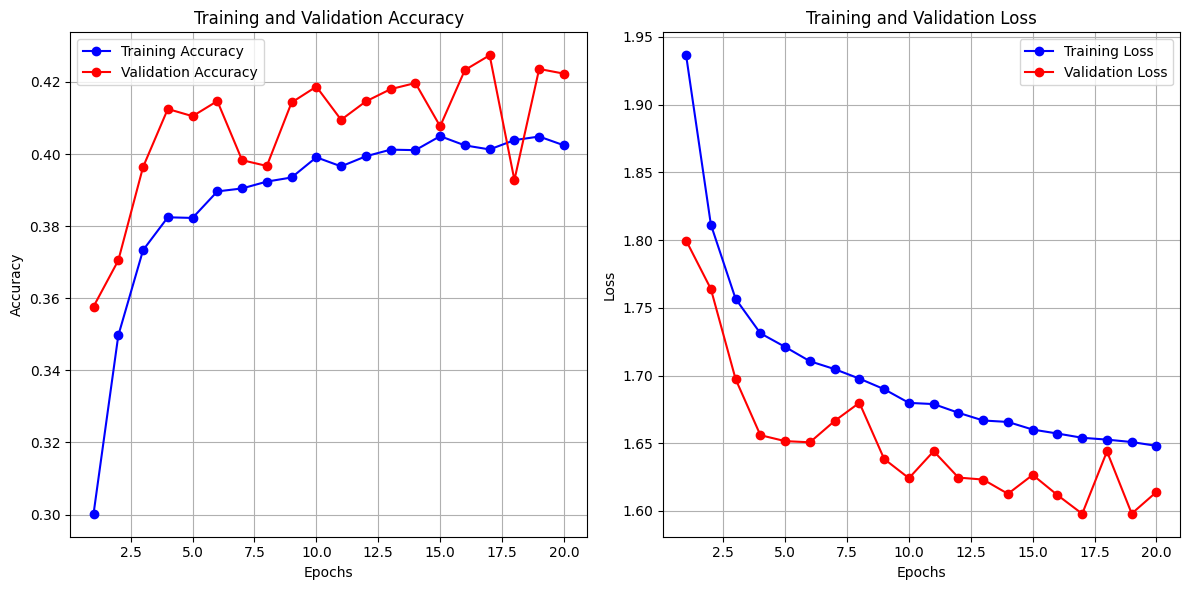

In [ ]:
print("################################################ M L P 1 #################################  \n")
plot_training_history(history_1)
print("################################################ M L P 2 #################################  \n")
plot_training_history(history_2)
print("################################################ M L P 3 ################################# \n")
plot_training_history(history_3)